In [1]:
import numpy as np
import numpy.linalg as algl
import matplotlib.pyplot as plt

In [2]:
SR = 48000
tempo = np.arange(0, 3, 1/SR)
cantor = np.zeros(len(tempo))
ouvinte = np.zeros(len(tempo))
#palma ideal (Delta de dirac)
cantor[0] = 1.

In [3]:
def distancia(x, y):
    diferenca = x - y
    N = len(x) #ou len(y)
    soma_quad = 0
    for i in range(N):
        soma_quad += diferenca[i]**2
    
    return np.sqrt(soma_quad)

In [4]:
r = np.array([1., 1.])
e = np.array([2., 2.])
ra = np.array([1., -1.])
c = 343

d1 = distancia(r, e)
d4 = 3*d1
d2 = distancia(e, ra)
d3 = d2

In [5]:
def atraso_em_amostras(d, c, SR):
    
    M = int(np.floor(d*SR/c))
    da = M*c/SR
    
    return M, da

In [6]:
M1, da1 = atraso_em_amostras(d1, c, SR)
M2, da2 = atraso_em_amostras(d2, c, SR)
M3, da3 = atraso_em_amostras(d3, c, SR)
M4, da4 = atraso_em_amostras(d4, c, SR)

In [7]:
def ganho(d):
    g = 1/d
    return g

In [8]:
g1 = ganho(da1)
g2 = ganho(da2)
g3 = ganho(da3)
g4 = ganho(da4)

In [9]:
ouvinte = np.zeros(len(tempo))
ouvinte[M1] += 1.*g1
ouvinte[M2] += 1.*g2
ouvinte[M3] += 1.*g3
ouvinte[M4] += 1.*g4

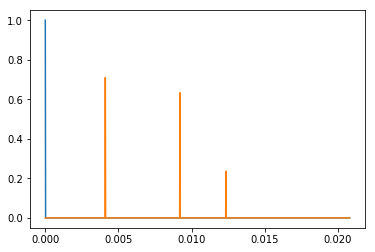

In [11]:
plt.plot(tempo[0:1000], cantor[0:1000])
plt.plot(tempo[0:1000], ouvinte[0:1000])
plt.show()